___ Creating a Students Score Bar Chart And Total etc.. ___

      
      
      Importing Dependensis  



In [38]:
import pandas as pd
import matplotlib.pyplot as plt

      Read the dataset using pandas.  

In [39]:
dataset = pd.read_csv('../datasets/student_scores.csv')

In [40]:
dataset.head()

,Name,English,Maths,Science,Social,Hindi
0,Amal,90,95,94,98,89
1,Neha,91,73,83,80,88
2,Rahim,66,59,72,68,61
3,Shamil,93,76,87,91,78
4,Rahul,76,87,75,94,89


In [41]:
print(dataset)

     Name  English  Maths  Science  Social  Hindi
0    Amal       90     95       94      98     89
1    Neha       91     73       83      80     88
2   Rahim       66     59       72      68     61
3  Shamil       93     76       87      91     78
4   Rahul       76     87       75      94     89


      Calculate total marks and add as a new column.  

In [42]:
dataset['Total'] = dataset[['English', 'Maths', 'Science', 'Social', 'Hindi']].sum(axis=1)

In [43]:
dataset.head()

,Name,English,Maths,Science,Social,Hindi,Total
0,Amal,90,95,94,98,89,466
1,Neha,91,73,83,80,88,415
2,Rahim,66,59,72,68,61,326
3,Shamil,93,76,87,91,78,425
4,Rahul,76,87,75,94,89,421


      Calculate average score for each student.  

In [44]:
dataset['Average'] = dataset['Total'] / 5

In [45]:
dataset.head()

,Name,English,Maths,Science,Social,Hindi,Total,Average
0,Amal,90,95,94,98,89,466,93.2
1,Neha,91,73,83,80,88,415,83.0
2,Rahim,66,59,72,68,61,326,65.2
3,Shamil,93,76,87,91,78,425,85.0
4,Rahul,76,87,75,94,89,421,84.2


      Assign grade based on Averages:  

      A+ → >90  

      A → 80-90  

      B → 70-79  

      C → 60-69  

      D → <60  

In [46]:
def assign_grade(avg):
    if avg >= 90:
        return 'A+'
    
    elif avg >= 80:
        return 'A'
    
    elif avg >= 70:
        return 'B'
    
    elif avg >= 60:
        return 'C'
    
    elif avg >= 50:
        return 'D'
    
    else: 
        return 'F'
    
dataset['Grade'] = dataset.apply(lambda row: assign_grade(row['Average']), axis=1)


In [47]:
dataset.head()

,Name,English,Maths,Science,Social,Hindi,Total,Average,Grade
0,Amal,90,95,94,98,89,466,93.2,A+
1,Neha,91,73,83,80,88,415,83.0,A
2,Rahim,66,59,72,68,61,326,65.2,C
3,Shamil,93,76,87,91,78,425,85.0,A
4,Rahul,76,87,75,94,89,421,84.2,A


       Bar chart showing total marks per student.  

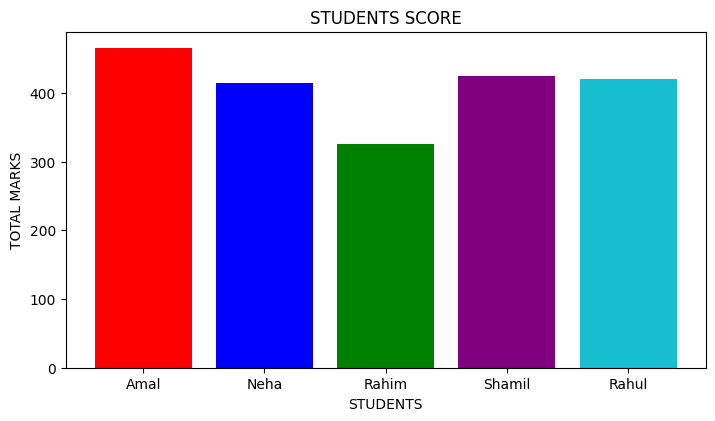

In [48]:
figure = plt.figure()
ax = figure.add_axes([0, 0, 1, 0.7])

students = dataset['Name']
total_mark = dataset['Total']

color = ['red', 'blue', 'green', 'purple', 'tab:cyan']

ax.bar(students, total_mark, color=color)

plt.xlabel('STUDENTS')
plt.ylabel('TOTAL MARKS')
plt.title('STUDENTS SCORE')
plt.show()

      Pie chart showing subject-wise average distribution.  

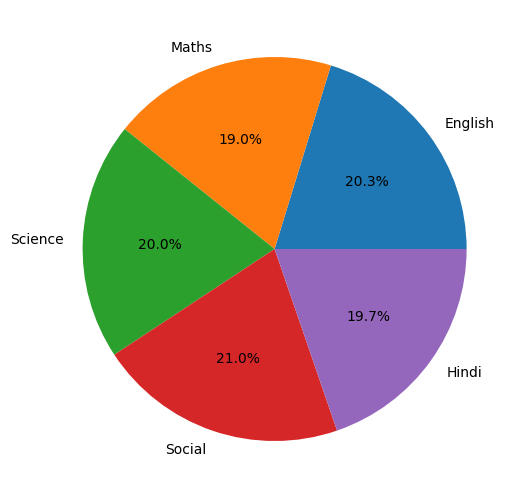

In [49]:
pie_figure = plt.figure()
ax = pie_figure.add_axes([0, 0, 1, 1])

subject_avgs = dataset[['English', 'Maths', 'Science', 'Social', 'Hindi']].mean()


ax.pie(subject_avgs, labels=subject_avgs.index, autopct='%1.1f%%')
plt.show()


      Find top 3 students (based on total).  

In [50]:
top_3 = dataset.sort_values(by='Total', ascending=False).head(3)

print(top_3[['Name', 'Total']])

     Name  Total
0    Amal    466
3  Shamil    425
4   Rahul    421


       Save result to Excel.  

In [51]:
dataset.head()

,Name,English,Maths,Science,Social,Hindi,Total,Average,Grade
0,Amal,90,95,94,98,89,466,93.2,A+
1,Neha,91,73,83,80,88,415,83.0,A
2,Rahim,66,59,72,68,61,326,65.2,C
3,Shamil,93,76,87,91,78,425,85.0,A
4,Rahul,76,87,75,94,89,421,84.2,A


In [52]:
dataset.to_excel('students_score_analysis.xlsx')